
# Gold Price Prediction using Machine Learning

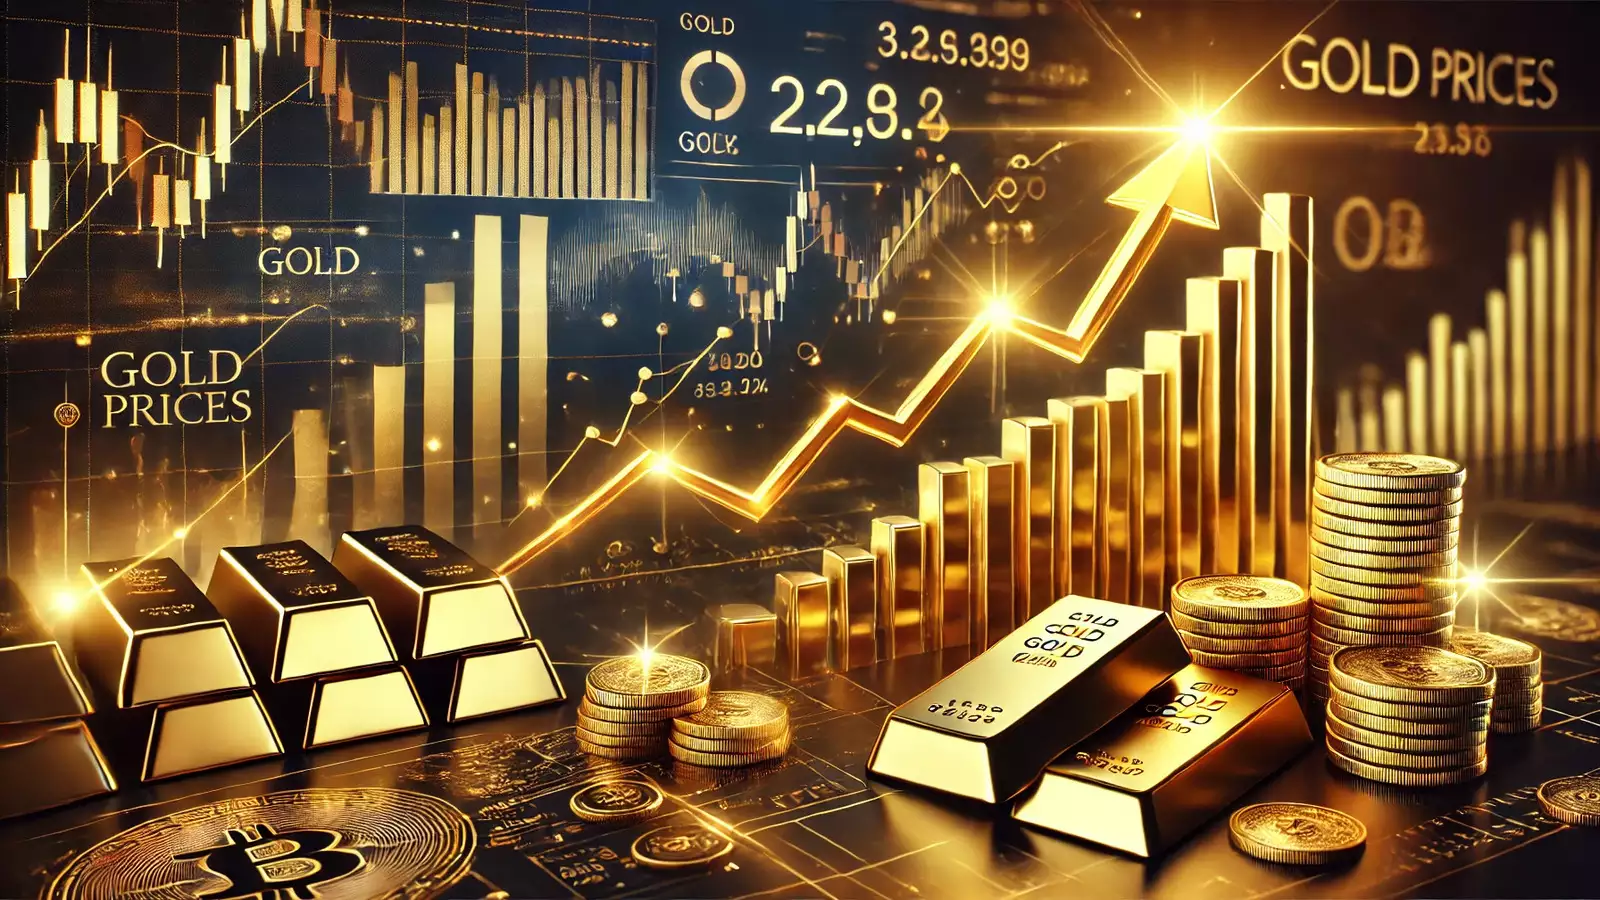

In [ ]:
We will go through : 

Problem Statement
Data collection
Data Cleaning
EDA
Cross-Validation
Model Training
Model deployment

# Problem Statement : 

Gold prices change every day due to various reasons like inflation, currency value, stock market trends, and global events.
Investors and traders want to predict future gold prices to make smart investment decisions.however gold prices are highly unpredictable 
and traditional methods often fail to give accurate results.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", UserWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [3]:
# read dataset using pndas function
# use parse_dates argument to change datetime dtype
df = pd.read_csv("gold_price_data (1).csv")

In [4]:
df

Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]

In [5]:
df = pd.read_csv("gold_price_data (1).csv", parse_dates=["Date"])

















In [6]:
df

Date          SPX         GLD        USO      SLV   EUR/USD
0    2008-01-02  1447.160034   84.860001  78.470001  15.1800  1.471692
1    2008-01-03  1447.160034   85.570000  78.370003  15.2850  1.474491
2    2008-01-04  1411.630005   85.129997  77.309998  15.1670  1.475492
3    2008-01-07  1416.180054   84.769997  75.500000  15.0530  1.468299
4    2008-01-08  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285 2018-05-08  2671.919922  124.589996  14.060000  15.5100  1.186789
2286 2018-05-09  2697.790039  124.330002  14.370000  15.5300  1.184722
2287 2018-05-10  2723.070068  125.180000  14.410000  15.7400  1.191753
2288 2018-05-14  2730.129883  124.489998  14.380000  15.5600  1.193118
2289 2018-05-16  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]

In [7]:
df.head()

Date          SPX        GLD        USO     SLV   EUR/USD
0 2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
1 2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2 2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
3 2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
4 2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099

In [8]:
df.tail()

Date          SPX         GLD      USO      SLV   EUR/USD
2285 2018-05-08  2671.919922  124.589996  14.0600  15.5100  1.186789
2286 2018-05-09  2697.790039  124.330002  14.3700  15.5300  1.184722
2287 2018-05-10  2723.070068  125.180000  14.4100  15.7400  1.191753
2288 2018-05-14  2730.129883  124.489998  14.3800  15.5600  1.193118
2289 2018-05-16  2725.780029  122.543800  14.4058  15.4542  1.182033

# Data Cleaning

In [9]:
df.shape

(2290, 6)

In [10]:
df.dtypes

Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
dtype: object

In [11]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [12]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

# EDA

In [14]:
df.describe()

Date          SPX          GLD          USO  \
count                           2290  2290.000000  2290.000000  2290.000000   
mean   2013-03-17 08:23:41.135371008  1654.315776   122.732875    31.842221   
min              2008-01-02 00:00:00   676.530029    70.000000     7.960000   
25%              2010-08-20 00:00:00  1239.874969   109.725000    14.380000   
50%              2013-03-13 12:00:00  1551.434998   120.580002    33.869999   
75%              2015-10-25 00:00:00  2073.010070   132.840004    37.827501   
max              2018-05-16 00:00:00  2872.870117   184.589996   117.480003   
std                              NaN   519.111540    23.283346    19.523517   

               SLV      EUR/USD  
count  2290.000000  2290.000000  
mean     20.084997     1.283653  
min       8.850000     1.039047  
25%      15.570000     1.171313  
50%      17.268500     1.303297  
75%      22.882500     1.369971  
max      47.259998     1.598798  
std       7.092566     0.131547

In [15]:
correlation=df.corr()  # to compute the corr matrix between numerical features in data

In [16]:
correlation

Date       SPX       GLD       USO       SLV   EUR/USD
Date     1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540
SPX      0.944033  1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.209118  0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.782230 -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.174108 -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.794540 -0.672017 -0.024375  0.829317  0.321631  1.000000

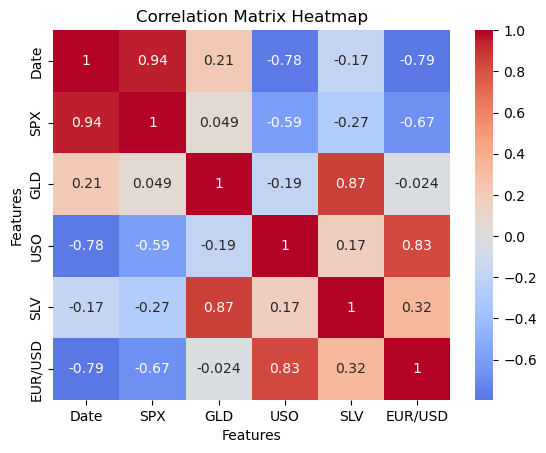

In [17]:
# Calculate correlation matrix

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
			center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

In [18]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

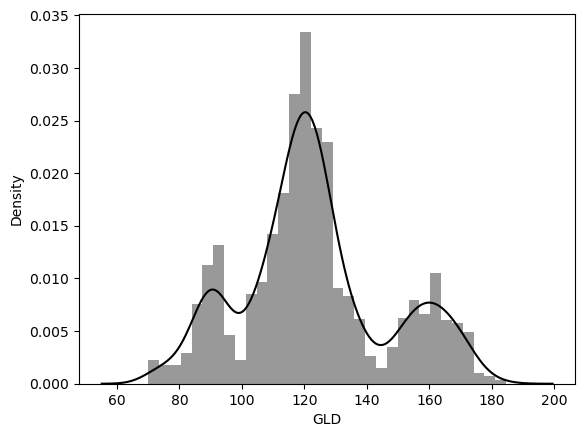

In [19]:
# check distribution of gold price prediction
sns.distplot(df['GLD'],color='Black')

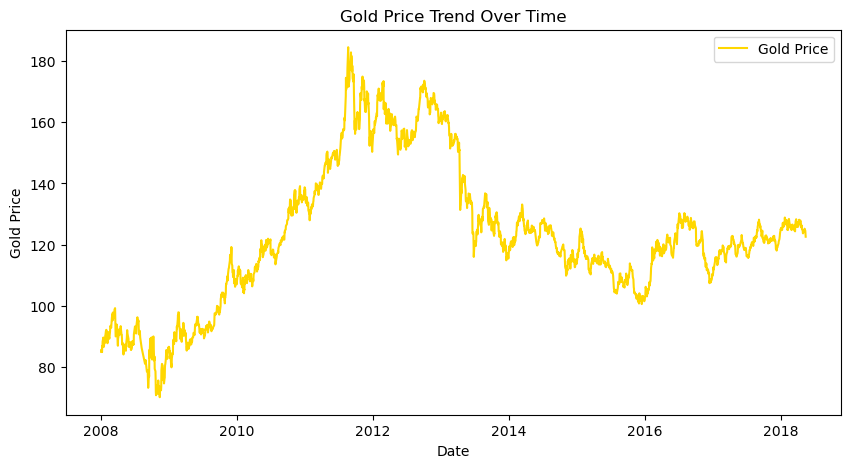

In [20]:
# gold price year wise trend ovwer time

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['GLD'], label="Gold Price", color='gold')
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Trend Over Time")
plt.legend()
plt.show()   # it shows the year wise gold price


In [20]:
df.drop(['Date'], axis=1, inplace=True)    # drop date column because ml models works on numerical column 

In [21]:
df

SPX         GLD        USO      SLV   EUR/USD
0     1447.160034   84.860001  78.470001  15.1800  1.471692
1     1447.160034   85.570000  78.370003  15.2850  1.474491
2     1411.630005   85.129997  77.309998  15.1670  1.475492
3     1416.180054   84.769997  75.500000  15.0530  1.468299
4     1390.189941   86.779999  76.059998  15.5900  1.557099
...           ...         ...        ...      ...       ...
2285  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 5 columns]

In [22]:
# splitting features and target 

X=df.drop(['GLD'],axis=1)   # for dropping column 1,for dropping rows 0
y=df['GLD']

In [23]:
X

SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]

In [24]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Scaling

In [25]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)

# cross Validation

In [26]:
# dividing dataset in to train test
X_train, X_test, y_train, y_test = train_test_split(X, y,
									test_size=0.2 , random_state=2)

# Model Training

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [28]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [29]:
# prediction on Test data
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [30]:
models = {
    "Linear Regression": lr, 
    "Random Forest": rf, 
}

for name, model in models.items():
    accuracy = model.score(X_test, y_test)  # Score-based accuracy
    
    print(f"{name}:")
    print(f"  Accuracy = {accuracy:.2%}")  # Display as a percentage
    print(" ")  # Separator


Linear Regression:
  Accuracy = 86.58%
 
Random Forest:
  Accuracy = 98.89%
 


# pickling

In [31]:
import pickle # for saving & loading python objects

In [32]:
# dump model using pickle librarySS

with open('gold_data_price.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [33]:
with open("gold_data_price.pkl", "rb") as model_file:
        model = pickle.load(model_file)

# Creating GUI

In [34]:
pip install tk

Note: you may need to restart the kernel to use updated packages.


In [21]:
import tkinter as tk
from tkinter import messagebox
import pickle
import numpy as np

# Load the trained model
with open("gold_data_price.pkl", "rb") as model_file:
    model = pickle.load(model_file)

def predict_price():
    try:
        # Get user inputs
        spx = float(spx_entry.get())
        uso = float(uso_entry.get())
        slv = float(slv_entry.get())
        eur_usd = float(eur_usd_entry.get())
        
        # Prepare input features
        input_features = np.array([[spx, uso, slv, eur_usd]])
        
        # Predict price
        predicted_price = model.predict(input_features)[0]
        
        # Display result
        result_label.config(text=f"Predicted Gold Price: ${predicted_price:.2f}", fg="blue", font=("Arial", 12, "bold"))
    
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI Setup
root = tk.Tk()
root.title("Gold Price Prediction")
root.geometry("400x400")
root.configure(bg="light gray")

tk.Label(root, text="Gold Price Prediction", font=("Eras Demi ITC", 24, "bold"), fg="white",bg="Black").pack(pady=10)

tk.Label(root, text="SPX", font=("Arial", 20, "bold"), bg="light Green").pack(pady=15)
spx_entry = tk.Entry(root, width=50)
spx_entry.pack()

tk.Label(root, text="USO", font=("Arial", 20, "bold"), bg="light green").pack(pady=15)
uso_entry = tk.Entry(root, width=50)
uso_entry.pack()

tk.Label(root, text="SLV", font=("Arial", 20, "bold"), bg="light green").pack(pady=15)
slv_entry = tk.Entry(root, width=50)
slv_entry.pack()

tk.Label(root, text="EUR/USD", font=("Arial", 20, "bold"), bg="light green").pack(pady=15)
eur_usd_entry = tk.Entry(root, width=50)
eur_usd_entry.pack()

predict_button = tk.Button(root, text="Predict Gold Price", command=predict_price, bg="pink", fg="black", width=20, font=("Eras Demi ITC", 20, "bold"))
predict_button.pack(pady=15)

# Fix: Rename result_button to result_label
result_label = tk.Label(root, text="", bg="white")
result_label.pack(pady=15)

root.mainloop()
